In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Pendulum-v1'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(1250, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1250, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,21-07-2023 21:30:43,200,0,200,0.009941,1,201,True,-1578.924133,-1578.924133,-1578.924133,-1578.924133,-1578.924133,COMCACT
1,1,2,Pendulum-v1,21-07-2023 21:36:18,400,0,400,0.019882,2,201,True,-1622.751658,-1600.837896,-1600.837896,-1600.837896,-1600.837896,COMCACT
2,1,3,Pendulum-v1,21-07-2023 21:41:59,600,0,600,0.029822,3,201,True,-1612.071730,-1604.582507,-1604.582507,-1604.582507,-1604.582507,COMCACT
3,1,4,Pendulum-v1,21-07-2023 21:47:39,800,0,798,0.039763,4,201,True,-1647.440217,-1615.296935,-1615.296935,-1615.296935,-1615.296935,COMCACT
4,1,5,Pendulum-v1,21-07-2023 21:53:19,1000,0,997,0.049704,5,201,True,-1750.445393,-1642.326626,-1642.326626,-1642.326626,-1642.326626,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,20-07-2023 23:28:33,200,201,0,0.009941,1,201,True,-1234.773541,-1234.773541,-1234.773541,-1234.773541,-1234.773541,DDPG
1,1,2,Pendulum-v1,20-07-2023 23:28:51,400,401,0,0.019882,2,201,True,-1283.609615,-1259.191578,-1259.191578,-1259.191578,-1259.191578,DDPG
2,1,3,Pendulum-v1,20-07-2023 23:29:09,600,601,0,0.029822,3,201,True,-1286.024975,-1268.136043,-1268.136043,-1268.136043,-1268.136043,DDPG
3,1,4,Pendulum-v1,20-07-2023 23:29:27,800,801,0,0.039763,4,201,True,-1731.668697,-1384.019207,-1384.019207,-1384.019207,-1384.019207,DDPG
4,1,5,Pendulum-v1,20-07-2023 23:29:45,1000,1001,0,0.049704,5,201,True,-1581.206194,-1423.456604,-1423.456604,-1423.456604,-1423.456604,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Pendulum-v1,21-07-2023 21:30:43,200,0,200,0.009941,1,201,True,-1578.924133,-1578.924133,-1578.924133,-1578.924133,-1578.924133,COMCACT
1,1,2,Pendulum-v1,21-07-2023 21:36:18,400,0,400,0.019882,2,201,True,-1622.751658,-1600.837896,-1600.837896,-1600.837896,-1600.837896,COMCACT
2,1,3,Pendulum-v1,21-07-2023 21:41:59,600,0,600,0.029822,3,201,True,-1612.071730,-1604.582507,-1604.582507,-1604.582507,-1604.582507,COMCACT
3,1,4,Pendulum-v1,21-07-2023 21:47:39,800,0,798,0.039763,4,201,True,-1647.440217,-1615.296935,-1615.296935,-1615.296935,-1615.296935,COMCACT
4,1,5,Pendulum-v1,21-07-2023 21:53:19,1000,0,997,0.049704,5,201,True,-1750.445393,-1642.326626,-1642.326626,-1642.326626,-1642.326626,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,Pendulum-v1,21-07-2023 05:54:19,49200,38694,0,0.999,246,201,True,-6.400757,-264.189775,-144.605376,-143.247265,-113.977456,DDPG
246,5,247,Pendulum-v1,21-07-2023 05:54:39,49400,38854,0,0.999,247,201,True,-127.258858,-263.635399,-144.698485,-143.456155,-113.989399,DDPG
247,5,248,Pendulum-v1,21-07-2023 05:54:59,49600,38988,0,0.999,248,201,True,-120.338916,-263.057591,-144.712176,-143.493582,-113.127479,DDPG
248,5,249,Pendulum-v1,21-07-2023 05:55:19,49800,39141,0,0.999,249,201,True,-124.999056,-262.503139,-144.670818,-139.362816,-113.406130,DDPG
249,5,250,Pendulum-v1,21-07-2023 05:55:38,50000,39319,0,0.999,250,201,True,-127.077046,-261.961434,-144.686946,-139.533935,-125.041168,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,21-07-2023 23:46:23,Pendulum-v1,5000,-35.373224,COMCACT
1,1,22-07-2023 02:07:24,Pendulum-v1,10000,-6.800706,COMCACT
2,1,22-07-2023 04:29:01,Pendulum-v1,15000,-0.509993,COMCACT
3,1,22-07-2023 06:50:29,Pendulum-v1,20000,-0.397945,COMCACT
4,1,22-07-2023 09:12:13,Pendulum-v1,25000,-21.238918,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-25.184164
std,1.428571,14507.211437,19.422142
min,1.000000,5000.000000,-52.097925
25%,2.000000,15000.000000,-45.198981
50%,3.000000,27500.000000,-21.280276
75%,4.000000,40000.000000,-6.731408
max,5.000000,50000.000000,-0.093716


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,20-07-2023 23:35:41,Pendulum-v1,5000,-15.651896,DDPG
1,1,20-07-2023 23:43:06,Pendulum-v1,10000,-40.578118,DDPG
2,1,20-07-2023 23:50:36,Pendulum-v1,15000,-37.053372,DDPG
3,1,20-07-2023 23:58:12,Pendulum-v1,20000,-0.195499,DDPG
4,1,21-07-2023 00:05:58,Pendulum-v1,25000,-12.293060,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-21.153984
std,1.428571,14507.211437,16.867812
min,1.000000,5000.000000,-50.669329
25%,2.000000,15000.000000,-36.375995
50%,3.000000,27500.000000,-17.790214
75%,4.000000,40000.000000,-5.202138
max,5.000000,50000.000000,-0.020401


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

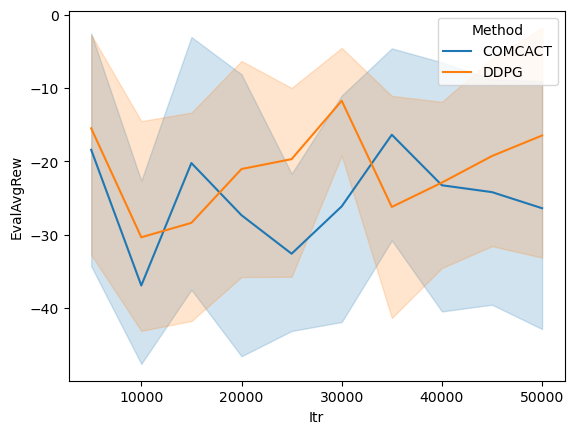

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-516.732065,COMCACT,-530.199469
100,20200,-773.462359,COMCACT,-522.144851
101,20400,-641.006930,COMCACT,-512.327404
102,20600,-254.296647,COMCACT,-498.749653
103,20800,-262.794852,COMCACT,-484.903199


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-500.307693,DDPG,-395.549754
100,20200,-238.572365,DDPG,-385.587742
101,20400,-18.726918,DDPG,-372.938915
102,20600,-614.204855,DDPG,-366.220714
103,20800,-389.709702,DDPG,-352.801124


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-516.732065,COMCACT,-530.199469
100,20200,-773.462359,COMCACT,-522.144851
101,20400,-641.006930,COMCACT,-512.327404
102,20600,-254.296647,COMCACT,-498.749653
103,20800,-262.794852,COMCACT,-484.903199


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,-6.400757,DDPG,-144.605376
246,49400,-127.258858,DDPG,-144.698485
247,49600,-120.338916,DDPG,-144.712176
248,49800,-124.999056,DDPG,-144.670818
249,50000,-127.077046,DDPG,-144.686946


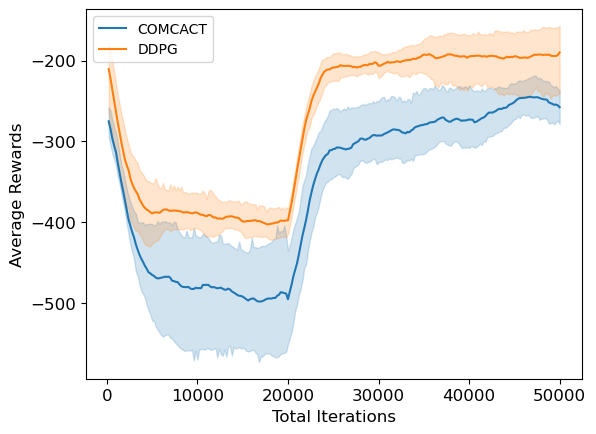

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-6.800706,COMCACT,-21.086965
2,15000,-0.509993,COMCACT,-3.655349
3,20000,-0.397945,COMCACT,-0.453969
4,25000,-21.238918,COMCACT,-10.818432
5,30000,-30.726548,COMCACT,-25.982733


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-40.578118,DDPG,-28.115007
2,15000,-37.053372,DDPG,-38.815745
3,20000,-0.195499,DDPG,-18.624436
4,25000,-12.293060,DDPG,-6.244279
5,30000,-21.076564,DDPG,-16.684812


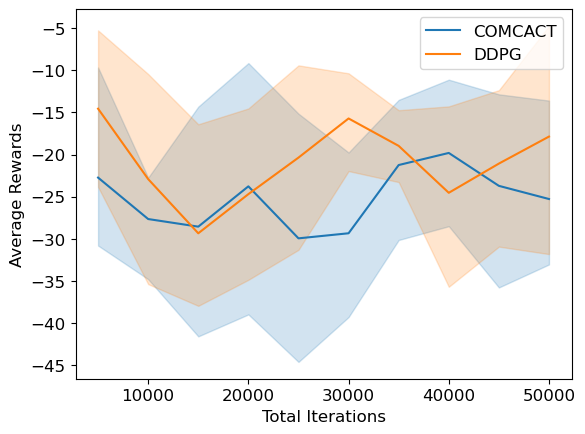

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-EVALUATION.png")

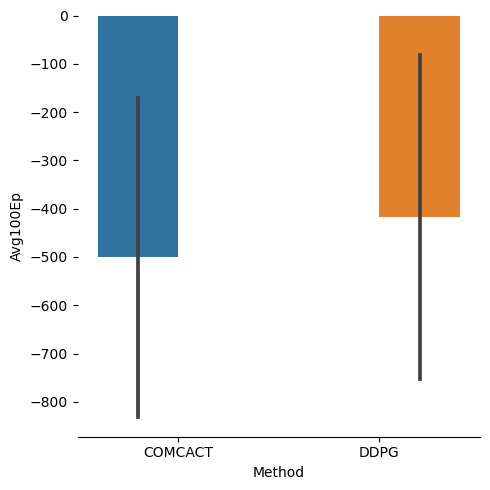

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

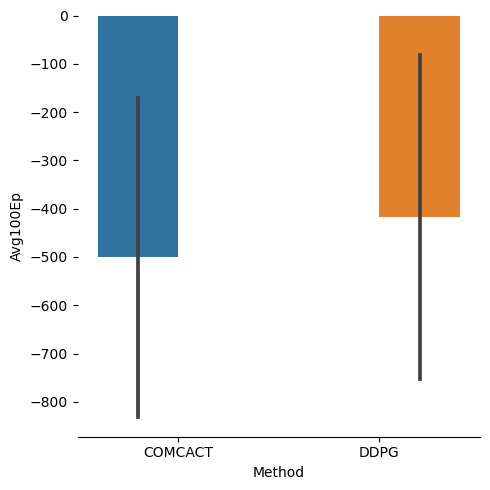

In [24]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)